<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/Research_Project/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# data source
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1095, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 10, 120)             │          58,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 120)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 10, 100)             │          88,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 10, 80)              │          57,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50)                  │          26,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,131 (902.86 KB)

 Trainable params: 231,131 (902.86 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 0.0399 - val_loss: 0.0116
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0171 - val_loss: 0.0119
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0161 - val_loss: 0.0131
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0172 - val_loss: 0.0116
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0152 - val_loss: 0.0127
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.0138 - val_loss: 0.0120
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0145 - val_loss: 0.0117
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0162 - val_loss: 0.0117
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0141 - val_loss: 0.0118
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0139 - val_loss: 0.0121
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0143 - val_loss: 0.0119
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss

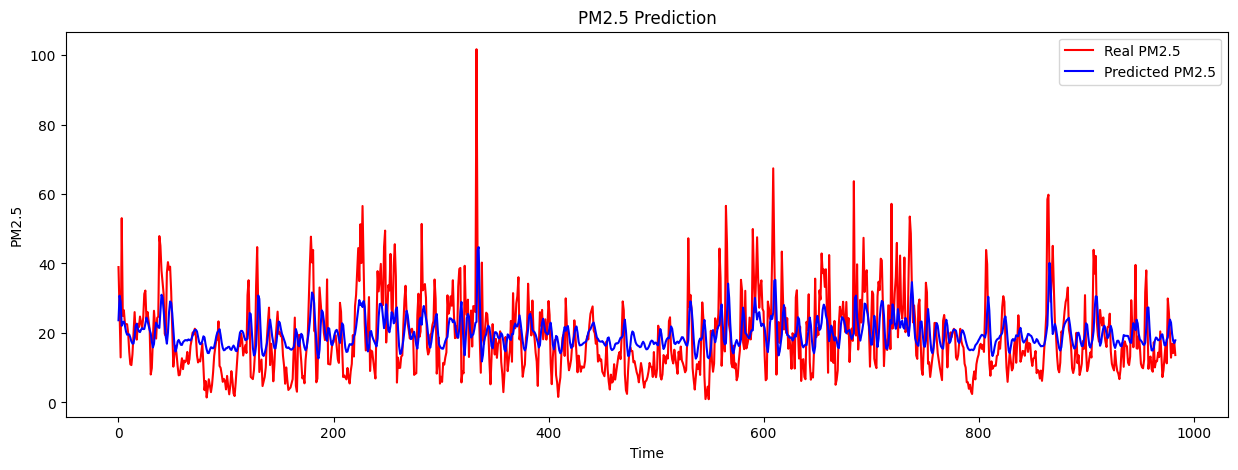

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
"We predict the PM2.5 whill be:
272.44482


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

all_pollution_data = pd.read_csv("/content/drive/My Drive/Taiwain_2009_2011.csv")

#show the first 5 rows of DataFrame
all_pollution_data.head()

# Reducing our dataset to PM2.5 column only (single column)
pollution_pm25 = all_pollution_data[['PM2.5']].values

print(pollution_pm25.shape)
# Output is (1095, 1) which is 1095 records in the dataset.

all_pollution_data.columns

# module to help transform data to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

pollution_pm25_scaled = scaler.fit_transform(pollution_pm25)

pollution_pm25_scaled

num_of_records = len(pollution_pm25_scaled)

# Create the training and test sets from pollution_pm25_scaled
pollution_pm25_features= []
pollution_pm25_labels = []
for i in range (10, (num_of_records)):
  pollution_pm25_features.append(pollution_pm25_scaled[i-10: i, 0])
  pollution_pm25_labels.append(pollution_pm25_scaled [i, 0])

x_train = np.array(pollution_pm25_features[0:100])
# Output as (100, 10) which means the x_train array is 2 dimensions of 100 rows and 10 columns

y_train = np.array(pollution_pm25_labels[0:100])
# Output as (100,) which means the y_train array is one dimensions and 100 rows

# print(x_train.shape)
# print(y_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print(x_train.shape)

# print(x_train[(0):(2)])

x_test = np.array(pollution_pm25_features[101:])
y_test = np.array(pollution_pm25_labels[101:])

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# print(x_test.shape)
# print(y_test.shape)

# Creating the Neural Network
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Model

input_layer = Input(shape = (x_train.shape[1],1))
lstm1=LSTM(120,activation='tanh',return_sequences=True)(input_layer)
dropout1=Dropout(0.1)(lstm1)
lstm2=LSTM(100,activation='tanh',return_sequences=True)(dropout1)
lstm3=LSTM(80,activation='tanh',return_sequences=True)(lstm2)
lstm4=LSTM(50,activation='tanh')(lstm3)
output_layer=Dense(1,activation='linear')(lstm4)
model=Model(input_layer,output_layer)
model.compile(optimizer="adam", loss="mse")

print(model.summary())

# print(x_train.shape)
# print(y_train.shape)

model_history = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test), verbose=1,)

y_pred = model.predict(x_test)
# print(y_pred.shape)

y_pred = scaler.inverse_transform(y_pred)

# print(y_pred)
# print(y_test.shape)

y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# print(y_test)

# Plot the data with matlib
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Real PM2.5')
plt.plot(y_pred, color = 'blue', label = 'Predicted PM2.5')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# Prediction Method for an input data set
new_array=np.array([17.06, 11.25, 29.92, 26.04, 19.96, 12.88, 16.9, 14.21, 17.5, 13.63])

new_array=new_array.reshape(-1, 1)

# print(new_array)
# print(new_array.shape)

new_array_scaled=scaler.fit_transform(new_array)

new_array_scaled=np.reshape(new_array_scaled, (1, 10, 1))

# print(new_array_scaled.shape)
# print(new_array_scaled)

new_pred=model.predict(new_array_scaled)

new_pred=scaler.inverse_transform(new_pred)

# print(new_pred.shape)

new_pred=scaler.inverse_transform(new_pred)

print('"We predict the PM2.5 whill be:')
print(*new_pred[0])

